In [1]:
import main as main

In [2]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from db import dbctrl as dbc
import string
from wordcloud import WordCloud
import re

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd

In [4]:
main.run_all()

'Program has sucessfully scraped and saved the data.'

In [20]:
def nbc4_la_scraper():
    ### Los Angeles, CA
    nbc4_la = urlopen('https://www.nbclosangeles.com/')
    nbc4_soup = BeautifulSoup(nbc4_la, 'html.parser')
    articles = nbc4_soup.find_all('a', class_='story-card__title-link')
    
    articles = [i.text.replace('\n', '').replace('\t','') for i in articles]
    
    articles = list(set(articles))
    
    return articles

In [27]:
def ktla():
    ktla = urlopen('https://ktla.com/news/')
    ktla_soup = BeautifulSoup(ktla, 'html.parser')
    articles = ktla_soup.find_all(class_='article-list__article-title')

    articles = [i.text.replace('\n', '').replace('\t','') for i in articles]
    
    articles = list(set(articles))
    
    return articles

In [42]:
def foxla():
    ### Los Angeles, CA
    foxla = urlopen('https://www.foxla.com/news')
    foxla_soup = BeautifulSoup(foxla, 'html.parser')
    articles = foxla_soup.find_all(class_='title')


    articles = [i.text.replace('\n', '') for i in articles if i.text != 'News' or i.text != 'Latest Local News']

    articles.remove('News')
    articles.remove('Latest Local News')
    
    articles = list(set(articles))

    return articles

### Seattle

In [6]:
def king5():
    king5 = urlopen('https://www.king5.com/')
    king5_soup = BeautifulSoup(king5, 'html.parser')
    articles = king5_soup.find_all('a', class_='headline-list__title')

    articles = [i.text for i in articles]
    
    articles = list(set(articles))

    return articles

['WA Notify app is alerting users of coronavirus exposures', 'Seahawks playing for big stakes in finale vs. 49ers Sunday', '6-year-old child, woman killed in 2-car collision on SR-702 near Yelm', 'Reports: Larry King, 87, in hospital with COVID-19', '1 dead, 2 seriously hurt after car crashes into power pole on Camano Island', 'Quinault Tribe recall 29 tons of Dungeness crab due to toxin', 'Reports: Larry King, 87, in hospital with COVID-19', 'Here are NFL games with playoff implications in Week 17', '3rd body found after landslide in Norway; 7 still missing', 'Appeals court dismisses lawsuit aimed at giving Pence power to overturn election', 'NBA Hall of Famer Paul Westphal dead at 70', "Iran plans 20% uranium enrichment 'as soon as possible'", 'Reports: Larry King, 87, in hospital with COVID-19', 'Here are NFL games with playoff implications in Week 17', '3rd body found after landslide in Norway; 7 still missing', 'Appeals court dismisses lawsuit aimed at giving Pence power to overtu

### San Francisco

In [11]:
def abc7_news_sf():
    abc7_news_sf = urlopen('https://abc7news.com/')
    abc7_news_soup = BeautifulSoup(abc7_news_sf, 'html.parser')
    articles = abc7_news_soup.find_all('div', class_='headline')

    articles = [i.text for i in articles]
    
    articles = list(set(articles))

    return articles

['COVID-19 Outbreak: Dozens of staff infected at SJ Kaiser Permanente ', "Chris Harrison gives inside scoop on 'Bachelor' Matt James", "'Ratatouille: The TikTok Musical' aims to cook up first-of-its-kind fun", 'Recall campaign against Gov. Newsom gains momentum', 'Analysts predict new trends in Bay Area rental market', 'Vacaville police dog punched by cop examined with no injuries', 'Defiant Napa restaurant offers in-person dining', 'Trump vetoes Calif. fishing bill over seafood trade deficit', 'Bay Area bridges go all-electronic with toll collection', 'Larry King hospitalized in Los Angeles with COVID, source says', 'You can now text 911 in Oakland ', 'McConnell, Pelosi homes vandalized after $2K relief fails', "Goodbye 2020: Here's what happened this year", "90 arrested, 900 given warnings at 'super-spreader' Calif. New Year's parties", 'New Mexico town says farewell to 2020 with dumpster fire', 'Building a Better Bay Area', 'This week on ABC7 Bay Area app', 'Prepare NorCal: Emergenc

In [22]:
def cbs_kpix_scraper():
    cbs_kpix_sf = urlopen('https://sanfrancisco.cbslocal.com/category/news/')
    cbs_kpix_soup = BeautifulSoup(cbs_kpix_sf, 'html.parser')
    titles = cbs_kpix_soup.find_all('strong', class_='title')

    articles = []

    for title in titles:
        check = title.text.split(' ')
        if len(check) > 4:
            articles.append(title.text)
            
    articles = list(set(articles))
        
    return articles

In [35]:
def the_sfnews_scraper():
    the_sfnews = urlopen('https://www.thesfnews.com/')
    the_sfnews_soup = BeautifulSoup(the_sfnews, 'html.parser')
    titles = the_sfnews_soup.find_all('a', class_='td-image-wrap')

    articles = []

    for title in titles:
        articles.append(title['title'])
    
    articles = list(set(articles))
    
    return articles

### San Diego

### Data

In [5]:
titles = dbc.grab_titles()

In [6]:
titles = [re.sub("\dh$", '', i) for i in titles]

In [7]:
stop_words = set(stopwords.words('english')) | set(string.punctuation)

In [8]:
cleaned_titles = []
for i in titles:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            
    cleaned_titles.append(filtered_sentence)

In [9]:
cleaned_words = []
for titles in cleaned_titles:
    for words in titles:
        cleaned_words.append(re.sub(r'\dh','', words))

In [10]:
listToStr = ' '.join([str(elem) for elem in cleaned_words])

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(listToStr)

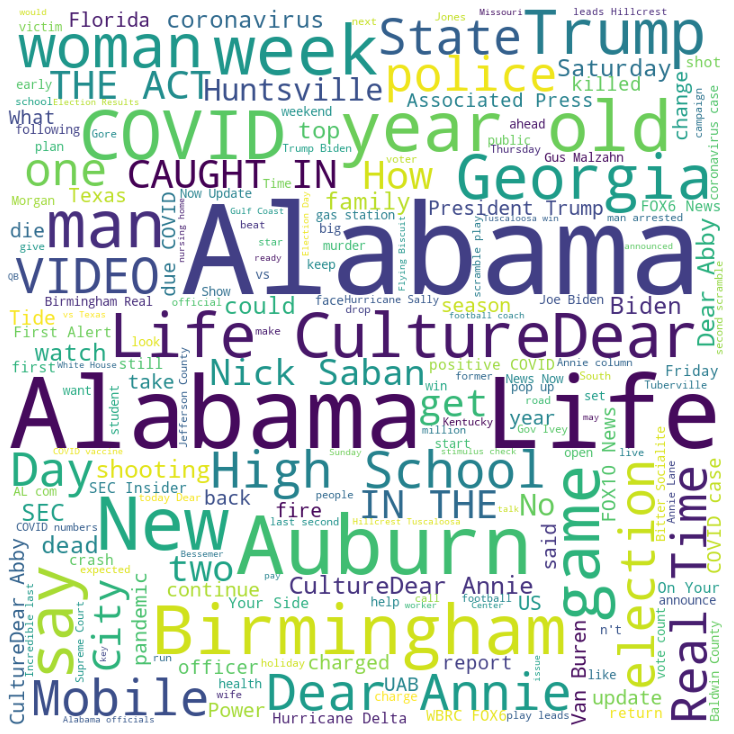

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig('wordcloud')

In [17]:
wordcloud.to_file('alabama_wordcloud.png')

### Observing the Data that we have collected

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [37]:
no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(titles)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 20
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
trump biden president election perspectives associated press wake joe campaign
Topic 1:
alabama 2020 week football coronavirus school news state high sec
Topic 2:
alabama day huntsville team veterans win texas world weather saban
Topic 3:
covid 19 hurricane alabama caught positive home health act people
Topic 4:
vote officials alabama say hospitals count biscuit woman malzahn pop
Topic 5:
mobile election says gas drive safety absentee construction basketball coming
Topic 6:
man county year police old birmingham time killed real woman
Topic 7:
tuscaloosa suspect birmingham second eta car leads play center 28
Topic 8:
auburn new georgia schools game south gulf city power han
Topic 9:
life alabama annie culturedear dear abby lane husband van buren
